In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_path = "mouse_metadata.csv"
results_path = "study_results.csv"

In [2]:
mouse = pd.read_csv(mouse_path)
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
result = pd.read_csv(results_path)
result

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
#Combine data into a single dataset and display
study = pd.merge(mouse, result, on= "Mouse ID")
study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#Check for number of mice
mice_number = len(study["Mouse ID"].value_counts())
mice_number

249

In [6]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint****
duplicate = study.loc[study.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [7]:
#Optional: Get all the data for the duplicate mouse ID
duplicate_data = study.loc[study["Mouse ID"] == "g989"]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
#Create a clean dataframe by dropping the duplicate mouse by its ID
clean_study = study[study["Mouse ID"].isin(duplicate)==False]

In [9]:
#Check number of mice in clean dataframe
clean_mice_number = len(clean_study["Mouse ID"].value_counts())
clean_mice_number

248

# Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

reg_mean = clean_study.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
reg_median = clean_study.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
reg_var = clean_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
reg_stdev = clean_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
reg_sem = clean_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

r = {
    "Mean":reg_mean,
    "Median":reg_median,
    "Variance":reg_var,
    "Std. Deviation":reg_stdev,
    "SEM":reg_sem
}

summary_table = pd.DataFrame(data = r)
summary_table

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

regimen_group = clean_study.groupby("Drug Regimen")

r2 = regimen_group.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

summary_table2 = pd.DataFrame(data = r2)
summary_table2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count_regimen = clean_study.groupby("Drug Regimen")["Mouse ID"].nunique()

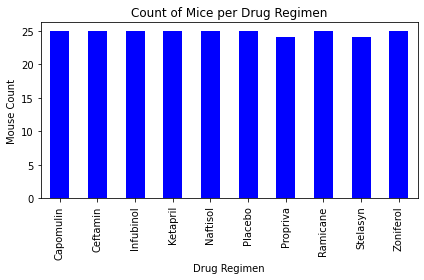

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [13]:
regimen_chart = count_regimen.plot(kind = "bar", color = "b", title = "Count of Mice per Drug Regimen", )
regimen_chart.set_ylabel("Mouse Count")

plt.tight_layout()
plt.show()
count_regimen

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mouse_list = clean_study.groupby("Drug Regimen")["Mouse ID"].nunique().to_list()
mouse_list

[25, 25, 25, 25, 25, 25, 24, 25, 24, 25]

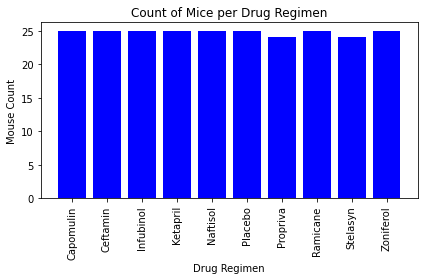

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [15]:
import numpy as np
x_axis = np.arange(len(mouse_list))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count_regimen.index, rotation = 90)

plt.bar(x_axis, mouse_list, color="b")

plt.title("Count of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")

plt.tight_layout()
plt.show()
count_regimen

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_gender = clean_study.groupby("Sex")["Mouse ID"].nunique()
count_gender


Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

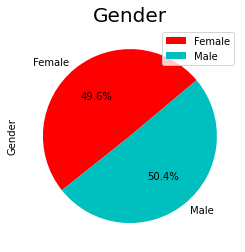

In [17]:
gender_pie = count_gender.plot(kind = "pie", autopct='%1.1f%%',startangle=40, legend = True, colors=["r","c"] )

gender_pie.set_title("Gender", fontsize= 20)
gender_pie.set_ylabel("Gender")


plt.show()

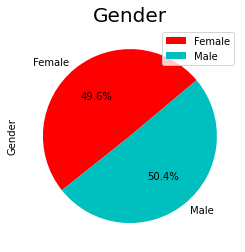

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

count_gender2 = count_gender
labels = count_gender.index

plt.pie(count_gender2, labels=labels, colors=["r","c"], autopct=("%1.1f%%"), startangle=40)
plt.legend()
plt.title("Gender", fontsize=20)
plt.ylabel("Gender")

plt.show()


# Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_study.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].max()
last_timepoint_df = pd.DataFrame(data = last_timepoint)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_results = last_timepoint_df.merge(clean_study, how="inner", on= ["Mouse ID", "Timepoint"])
final_results

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [21]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvalue = final_results["Tumor Volume (mm3)"].loc[final_results["Drug Regimen"] == drug]
    
    # add subset 
    tumor_vol.append(tumorvalue)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorvalue.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"The lower quartile of {drug} is: {round(lowerq,2)}")
    print(f"The upper quartile of {drug} is: {round(upperq,2)}")
    print(f"The interquartile range of {drug} is: {round(iqr,2)}")
    print(f"The the median of {drug} is: {round(quartiles[0.5],2)} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"With {drug}, values below {round(lower_bound,2)} could be outliers.")
    print(f"With {drug}, values above {round(upper_bound,2)} could be outliers.\n")
    

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
With Capomulin, values below 20.7 could be outliers.
With Capomulin, values above 51.83 could be outliers.

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
With Ramicane, values below 17.91 could be outliers.
With Ramicane, values above 54.31 could be outliers.

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
With Infubinol, values below 36.83 could be outliers.
With Infubinol, values above 82.74 could be outliers.

The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85 
With Cef

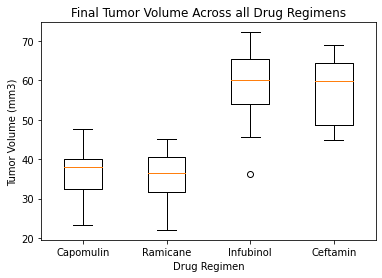

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Across all Drug Regimens")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.set_xticklabels(treatments)
ax1.boxplot(tumor_vol)
plt.show()

# Line and Scatterplots

In [23]:
locate_capomulin_mouse = clean_study.groupby(["Drug Regimen", "Mouse ID"]).count()
locate_capomulin_mouse

#I'll use b742 for this exercise

Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen Mouse ID                                           
Capomulin    b128       10          10          10         10   
             b742       10          10          10         10   
             f966        5           5           5          5   
             g288       10          10          10         10   
             g316       10          10          10         10   
...                    ...         ...         ...        ...   
Zoniferol    q633       10          10          10         10   
             s337       10          10          10         10   
             w140        2           2           2          2   
             w575       10          10          10         10   
             x613        4           4           4          4   

                       Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen Mouse ID                                        
Capomulin    b128                      10                10  
             b742                      10                10  
             f966                       5                 5  
             g288                      10                10  
             g316                      10                10  
...                                   ...               ...  
Zoniferol    q633                      10                10  
             s337                      10                10  
             w140                       2                 2  
             w575                      10                10  
             x613                       4                 4  

[248 rows x 6 columns]

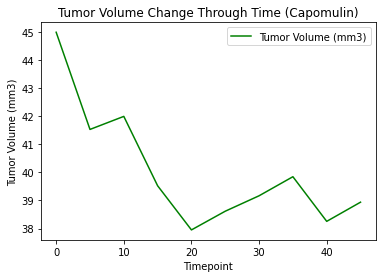

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line_graph = clean_study.loc[clean_study["Mouse ID"] == "b742"]

ax = line_graph.plot(x="Timepoint", y="Tumor Volume (mm3)", color = "g")
ax.set_title("Tumor Volume Change Through Time (Capomulin)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Timepoint")

plt.show()

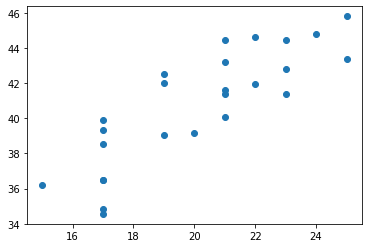

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_reg = clean_study.loc[clean_study["Drug Regimen"] == "Capomulin"]
capomulin_reg_meantumor = capomulin_reg.groupby(["Mouse ID"]).mean()
capomulin_reg_meantumor = capomulin_reg_meantumor.reset_index()

capomulin_reg_meantumor

plt.scatter(capomulin_reg_meantumor["Weight (g)"], capomulin_reg_meantumor["Tumor Volume (mm3)"])

plt.show()

# Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

corr = round(st.pearsonr(capomulin_reg_meantumor["Weight (g)"], capomulin_reg_meantumor["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and tumor volume is {corr}")

The correlation between mouse weight and tumor volume is 0.84


The r-squared is  + 0.71


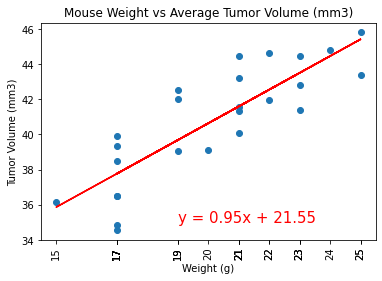

In [35]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_reg_meantumor["Weight (g)"]
y_values = capomulin_reg_meantumor["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,35),fontsize=15,color="red")

plt.title("Mouse Weight vs Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(x_values, rotation = 90)

print(f"The r-squared is  + {round(rvalue**2,2)}")
plt.show()

In [39]:
#EXTRA: AGE VS TUMOR VOLUME
corr = round(st.pearsonr(capomulin_reg_meantumor["Age_months"], capomulin_reg_meantumor["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse age and tumor volume is {corr}")

The correlation between mouse age and tumor volume is 0.02


The r-squared is  + 0.0


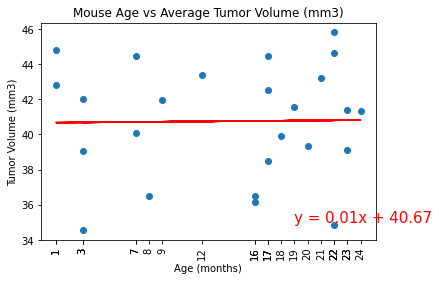

In [40]:
x_values = capomulin_reg_meantumor["Age_months"]
y_values = capomulin_reg_meantumor["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,35),fontsize=15,color="red")

plt.title("Mouse Age vs Average Tumor Volume (mm3)")
plt.xlabel("Age (months)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(x_values, rotation = 90)

print(f"The r-squared is  + {round(rvalue**2,2)}")
plt.show()

## Conclusions and Insights

## 1. Across the four Drug Regimens of interest, Capomulin and Ramicane show the best results in diminishing the tumor volume of the mice.

## 2. The Pearson's Correlation between Mice Weight and Tumor Volume is equal to .84. This means that there is a strong correlation between those two variables (eg. the heavier the mouse, the larger the tumor). Furthermore, the R-squared of the Regression Model is equal to .74. This means that roughly 74% of the data is represented in this model.

## 3. The age of the mice has no correlation to the Tumor Volume. Meaning, the age of mice has no say in the effectiveness of the treatment.